## Save the Galaxy Kaggle Competition 2019
* Emily J. Cain, Data Science Jedi Knight

### Message Received
__Future Data Science Jedi Knight! Years ago, you served with my father in the Clone Wars.  Now he begs you to help him in his struggle against the Empire. The Rebellion is under siege from a new division of the Empire – propaganda video games!  We need you to predict the sales of a collection of their video games. We'll use this information to bring peace to the Galaxy.__

__This is our most desperate hour.  Help me, Future Data Science Jedi Knight. You’re my only hope.__  
*looks to the side quickly, then crouches to end the message*

In [1]:
import pandas as pd
import numpy as np
import warnings

from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
warnings.filterwarnings('ignore')

## I. Load & Inspect Data
Columns that aren't self-explanatory
* NA_Sales - game sales in North America (per millions of units)
* JP_Sales - game sales in Japan (per millions of units)
* Critic_Score - aggregate score compiled by Metacritic staff
* Critic_Count - number of critics used in computing Critic_Score
* User_Score - score from Metacritic subscribers
* User_Count - number of users who contributed to User_Score
* Rating - ESRB Rating (i.e. Everyone, Teen, Mature, Adults Only)

In [4]:
sample_submission = pd.read_csv('flatironschool_data/df_sample_submission.csv')
sample_submission.head()

,Id,Prediction
0,11703,2.39
1,11704,4.75
2,11705,0.20
3,11706,8.47
4,11707,2.95


In [5]:
test_data = pd.read_csv('flatironschool_data/test.csv')
test_data.head()

,Id,Platform,Year_of_Release,Genre,Publisher,JP_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,11703,GB,1996.0,Role-Playing,Nintendo,10.22,NaN,NaN,NaN,NaN,NaN,NaN
1,11704,Wii,2006.0,Misc,Nintendo,2.93,58.0,41.0,6.6,129.0,Nintendo,E
2,11705,NES,1984.0,Shooter,Nintendo,0.28,NaN,NaN,NaN,NaN,NaN,NaN
3,11706,DS,2005.0,Simulation,Nintendo,1.93,NaN,NaN,NaN,NaN,NaN,NaN
4,11707,PS3,2013.0,Action,Take-Two Interactive,0.98,97.0,50.0,8.2,3994.0,Rockstar North,M


In [6]:
test_data.shape

(5016, 12)

In [7]:
df = pd.read_csv('flatironschool_data/train.csv')
df.head()

,Id,NA_Sales,Platform,Year_of_Release,Genre,Publisher,JP_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,0,0.00,PSP,2008.0,Misc,Sony Computer Entertainment,0.06,81.0,49.0,8.3,62.0,SCE Japan Studio,E
1,1,0.72,2600,1982.0,Shooter,Atari,0.00,NaN,NaN,NaN,NaN,NaN,NaN
2,2,0.11,XB,2004.0,Action,THQ,0.00,NaN,NaN,NaN,NaN,NaN,NaN
3,3,0.15,X360,2008.0,Fighting,Electronic Arts,0.00,54.0,57.0,6.3,19.0,EA Canada,T
4,4,0.00,DS,2006.0,Action,Namco Bandai Games,0.01,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df.shape

(11703, 13)

In [10]:
# test data includes every column except for NA_Sales

In [11]:
test_data.isnull().sum()

Id                    0
Platform              0
Year_of_Release      86
Genre                 0
Publisher            15
JP_Sales              0
Critic_Score       2576
Critic_Count       2576
User_Score         2012
User_Count         2758
Developer          1986
Rating             2044
dtype: int64

In [12]:
# Platform, Genre, and JP_Sales. . . hmm

In [13]:
df.NA_Sales.corr(df.JP_Sales)

0.48092026820928735

### II. Exploratory Data Analysis

In [14]:
classic_nintendo_colors = ['#020202', '#535353', '#9FA19E', '#C4C4C4', '#C42B1F']

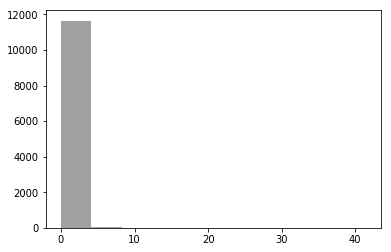

In [17]:
plt.hist(df.NA_Sales, color=classic_nintendo_colors[2]);

In [19]:
df.describe()

,Id,NA_Sales,Year_of_Release,JP_Sales,Critic_Score,Critic_Count,User_Count
count,11703.000000,11703.000000,11520.00000,11703.000000,5697.000000,5697.000000,5332.000000
mean,5851.000000,0.267547,2006.55217,0.080238,68.909602,26.554151,166.707802
std,3378.509435,0.851607,5.85593,0.318587,14.052323,19.193370,581.024155
min,0.000000,0.000000,1980.00000,0.000000,13.000000,3.000000,4.000000
25%,2925.500000,0.000000,2003.00000,0.000000,60.000000,12.000000,10.000000
50%,5851.000000,0.080000,2007.00000,0.000000,71.000000,22.000000,25.000000
75%,8776.500000,0.240000,2010.00000,0.040000,79.000000,36.000000,84.000000
max,11702.000000,41.360000,2017.00000,7.200000,98.000000,113.000000,10665.000000


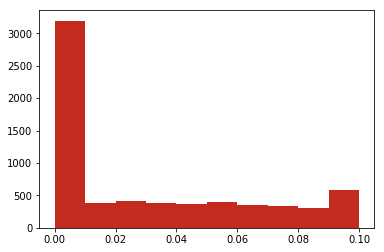

In [26]:
plt.hist(df.NA_Sales, range=[0,0.1], color=classic_nintendo_colors[4]);

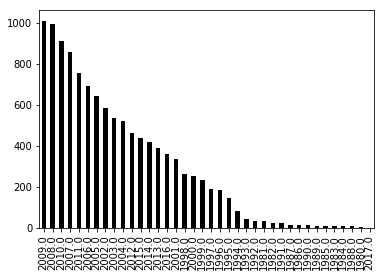

In [28]:
df.Year_of_Release.value_counts().plot(kind='bar', color=classic_nintendo_colors[0]);